# Clasificación del cancer del seno

In [26]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [27]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
from tensorflow.keras.models import Sequential
#
from tensorflow.keras.layers import Dense, Dropout
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#
print(tf.__version__)

2.3.0


In [28]:
# Importing data
data = pd.read_csv('data.csv')
del data['Unnamed: 32']
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Preprocesamiento

In [29]:
x = data.iloc[:,2:].values # extrae como tensores numpy
y = data.iloc[:,1].values

# Recodifica la variable objetivo

In [30]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

# Dividir los datos entre entrenamiento y test

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)


In [32]:
x_test.shape

(57, 30)

# Normaliza los datos

In [33]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Crear un modelo Sequential modo 2

In [34]:
classifier = Sequential()
## Adiciona capas una por una
classifier.add(Dense(units=16, activation='relu', input_shape=(30,)))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1)) # 10% out in each epoc
classifier.add(Dense(units=16, activation='relu'))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compila

In [35]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                496       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


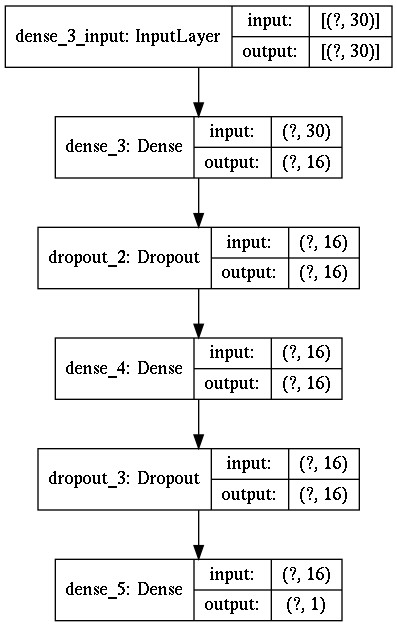

In [36]:
classifier.summary()
plot_model(classifier, to_file='cancer_seno.png', 
           show_shapes=True)

# Entrenamiento

In [37]:
history = classifier.fit(x_train, y_train, batch_size=32, epochs=150,validation_split = 0.2)

Epoch 1/150
13/13 [==============================] - 0s 10ms/step - loss: 0.6278 - accuracy: 0.6919 - val_loss: 0.5395 - val_accuracy: 0.7864
Epoch 2/150
13/13 [==============================] - 0s 3ms/step - loss: 0.5117 - accuracy: 0.8020 - val_loss: 0.4453 - val_accuracy: 0.8641
Epoch 3/150
13/13 [==============================] - 0s 6ms/step - loss: 0.4259 - accuracy: 0.8680 - val_loss: 0.3717 - val_accuracy: 0.8835
Epoch 4/150
13/13 [==============================] - 0s 7ms/step - loss: 0.3698 - accuracy: 0.8949 - val_loss: 0.3124 - val_accuracy: 0.9029
Epoch 5/150
13/13 [==============================] - 0s 6ms/step - loss: 0.3126 - accuracy: 0.9095 - val_loss: 0.2633 - val_accuracy: 0.9223
Epoch 6/150
13/13 [==============================] - 0s 6ms/step - loss: 0.2613 - accuracy: 0.9120 - val_loss: 0.2244 - val_accuracy: 0.9320
Epoch 7/150
13/13 [==============================] - 0s 6ms/step - loss: 0.2290 - accuracy: 0.9315 - val_loss: 0.1941 - val_accuracy: 0.9417
Epoch 8/150


# Predicciones

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

# Matriz de confusión

In [39]:
cm = confusion_matrix(y_test, y_pred)

In [40]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 98.24561403508771%


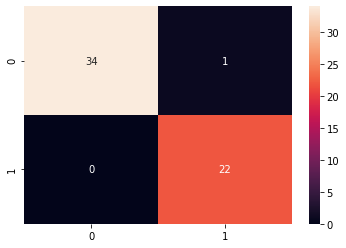

In [41]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

# Evaluación del modelo

In [42]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

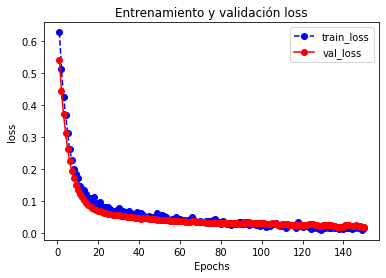

In [43]:
plot_metric(history, 'loss')

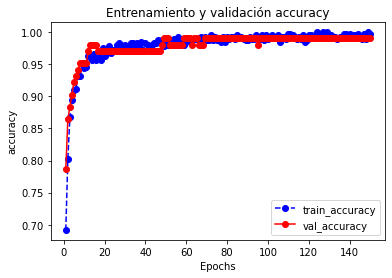

In [44]:
plot_metric(history, 'accuracy')